### Homework 7 — *College Student Success Analytics*
**Topics:** Pandas, NumPy, Matplotlib  

**Goal:**  For this homework, I want you to practices with pandas, numpy, and matplotlib but I want you also to practice figuring out what the data is telling us!  So, story-telling is a learning goal:)  

Two synthetic datasets describe **250 fictional Rhodes students**. 

| File | Rows | Description |
|------|------|-------------|
| `student_academic.csv` | 250 | One row per student: GPA, credits, study hours, attendance, etc. |
| `student_activities.csv` | 0–650 | One row per *activity* a student joins (0–3 per student) with hours/week & leadership flag |

---
## Task
The Dean of Students wants to know which factors predict academic success and whether co‑curricular involvement helps or hurts. Produce a short analytics report (and this reproducible notebook) that answers her questions.

---
## Part A — Data Wrangling *(15 pts)*
1. **Load & inspect** both CSVs (done above). Show shape and `dtypes`.
2. **Handle missing values** (~5 % already inserted). Choose a strategy to fix it **and justify it in the comments**.
3. **Add Three Columns** (GPA_change, StudyIntensity, AttendanceFlag) to the data frame calculated as follows:
```text
GPA_change          = GPA_Sem2 – GPA_Sem1
StudyIntensity = Hours_Study / Credits_Enrolled
AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0
```


In [26]:
#PART A: Data Wrangling
import pandas as pd
df = pd.read_csv('student_academic.csv')
td = pd.read_csv('student_activities.csv')
print(df.shape)
print(df.dtypes)
print()
print(td.shape)
print(td.dtypes)


(250, 9)
StudentID             int64
Major                object
ClassYear            object
GPA_Sem1            float64
GPA_Sem2            float64
Credits_Enrolled      int64
Hours_Study         float64
AttendanceRate      float64
Scholarship          object
dtype: object

(364, 4)
StudentID          int64
Activity          object
HoursPerWeek       int64
LeadershipRole    object
dtype: object


In [28]:
df["GPA_Sem1"].fillna(-1, inplace = True)
df["GPA_Sem2"].fillna(-1, inplace = True)
df["Hours_Study"].fillna(-1, inplace = True)
df["AttendanceRate"].fillna(-1, inplace = True)
#print(df.head(30))

/var/folders/w0/_tr00rv15yn01r1rzbc4lccm0000gn/T/ipykernel_44066/750562000.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GPA_Sem1"].fillna(-1, inplace = True)
/var/folders/w0/_tr00rv15yn01r1rzbc4lccm0000gn/T/ipykernel_44066/750562000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [30]:
df["GPA_change"] = df["GPA_Sem2"] - df["GPA_Sem1"]
df["StudyIntensity"] = df["Hours_Study"] / df["Credits_Enrolled"]
df["AttendanceFlag"] = (df["AttendanceRate"] >= 0.9).astype(int)
print(df.head(10))

   StudentID       Major  ClassYear  GPA_Sem1  GPA_Sem2  Credits_Enrolled  \
0       1001  Psychology   Freshman      3.86      3.68                14   
1       1002     English     Senior      3.01      3.29                13   
2       1003   Economics     Senior      3.23      3.23                15   
3       1004     English  Sophomore      2.96      2.85                16   
4       1005     English     Senior      2.93      2.92                12   
5       1006     Biology     Senior      3.09      2.72                16   
6       1007   Economics  Sophomore      3.09      2.33                18   
7       1008   Economics     Junior      2.96      3.04                13   
8       1009   Economics     Senior      2.98      3.08                16   
9       1010     English  Sophomore      3.64      4.00                12   

   Hours_Study  AttendanceRate Scholarship  GPA_change  StudyIntensity  \
0         12.0            0.98          No       -0.18        0.857143   
1   

---
## Part B — Exploratory Analyses *(55 pts)*
The difficulty of this problem that the data is contained in two different data sets.  They are connected by StudentID.  You'll need to google this and figure out how to *merge* the data.   Make sure you do it correctly.

| # | Question | Pts |
|---|----------|-----|
| 1 | **GPA shift.** Distribution of `GPA_change`. Print out the top 10 improvers. | 8 |
| 2 | **Study habits.** Pearson correlation between `StudyIntensity` and `GPA_Sem2`; Visualize with scatter and print out the Pearson correlation (in our notes).    | 8 |
| 3 | **Scholarships.** Mean & SD of `GPA_Sem2` for scholarship vs non‑scholarship.  Visualize this with box plot. | 6 |
| 4 | **Attendance.** Compute the average `GPA_Sem2` for `AttendanceFlag` = 1 vs 0. Visualize this with a bar chart. | 6 |
| 5 | **Activity load.** Compute total `Activity_Hours`; plot vs `GPA_Sem2`. | 6 |
| 6 | **Leadership.** Does *any* leadership role correspond to higher GPA?  Plot this with box plot (include average and std for each leadership role).  You might have to groupby...| 7 |
| 7 | **Major comparison.** For every major: mean GPA, mean study hours, scholarship %. Print out  and Visualize with a grouped bar chart. | 8 |
| 8 | **Predictive index.** Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable `SuccessScore`; list top 15. | 6 |

In [32]:
# You can break this cell up if you prefer.
print(df.nlargest(10, "GPA_change"))

     StudentID             Major ClassYear  GPA_Sem1  GPA_Sem2  \
12        1013           English  Freshman      -1.0      4.00   
100       1101        Psychology    Senior      -1.0      3.86   
217       1218        Psychology    Senior      -1.0      3.66   
65        1066        Psychology  Freshman      -1.0      3.48   
102       1103        Psychology  Freshman      -1.0      3.23   
85        1086  Computer Science  Freshman      -1.0      3.22   
25        1026         Economics  Freshman      -1.0      3.18   
209       1210        Psychology    Senior      -1.0      3.10   
120       1121           Biology    Junior      -1.0      3.04   
168       1169  Computer Science    Junior      -1.0      2.65   

     Credits_Enrolled  Hours_Study  AttendanceRate Scholarship  GPA_change  \
12                 15         39.0            0.95         Yes        5.00   
100                12         36.0            0.79         Yes        4.86   
217                13         12.0     

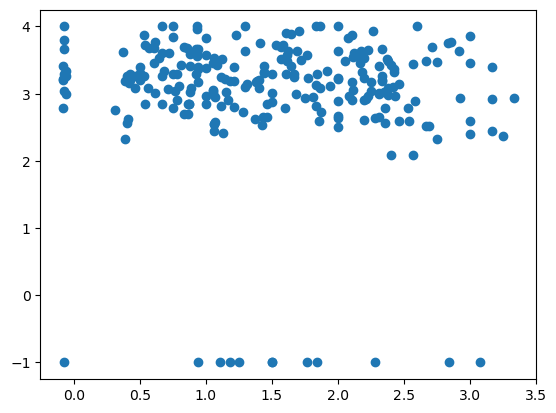

In [38]:
import matplotlib.pyplot as plt
plt.scatter(df["StudyIntensity"], df["GPA_Sem2"])

/var/folders/w0/_tr00rv15yn01r1rzbc4lccm0000gn/T/ipykernel_44066/6454405.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scholarship', y='GPA_Sem2', data=df, palette='Set2')


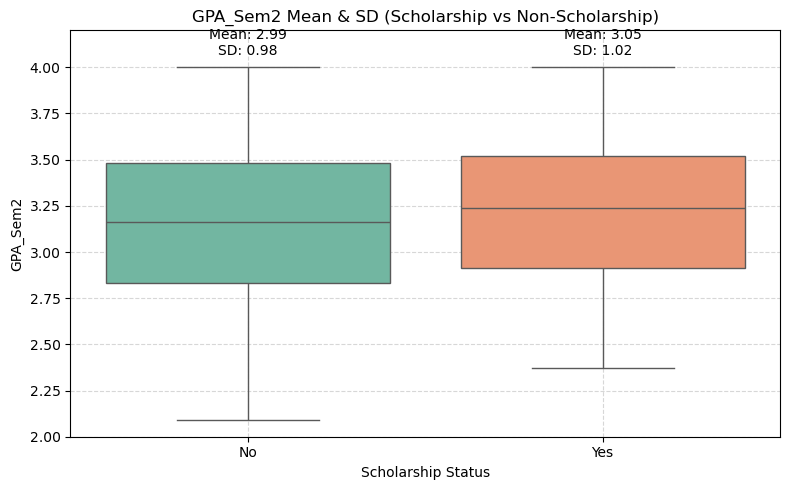

In [52]:
import seaborn as sns

Sch_yes = df[df["Scholarship"] == "No"]
Sch_no = df[df["Scholarship"] == "Yes"]

yes_mean = Sch_yes["GPA_Sem2"].mean()
no_mean = Sch_no["GPA_Sem2"].mean()
yes_sd = Sch_yes["GPA_Sem2"].std()
no_sd = Sch_no["GPA_Sem2"].std()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Scholarship', y='GPA_Sem2', data=df, palette='Set2')

plt.text(x=0, y=Sch_yes["GPA_Sem2"].max() + 0.05,
         s=f"Mean: {yes_mean:.2f}\nSD: {yes_sd:.2f}", 
         ha='center', va='bottom', fontsize=10)

plt.text(x=1, y=Sch_no["GPA_Sem2"].max() + 0.05,
         s=f"Mean: {no_mean:.2f}\nSD: {no_sd:.2f}", 
         ha='center',va='bottom', fontsize=10)

plt.title('GPA_Sem2 Mean & SD (Scholarship vs Non-Scholarship)')
plt.xlabel('Scholarship Status')
plt.ylabel('GPA_Sem2')
plt.ylim(2.0, 4.2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

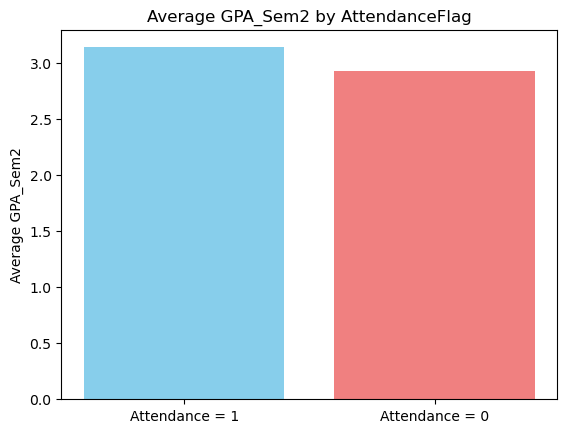

In [54]:
att_y = df[df["AttendanceFlag"] == 1]
att_n = df[df["AttendanceFlag"] == 0]

Ymean = att_y["GPA_Sem2"].mean()
Nmean = att_n["GPA_Sem2"].mean()

plt.bar(['Attendance = 1', 'Attendance = 0'], [Ymean, Nmean], color=['skyblue', 'lightcoral'])
plt.title('Average GPA_Sem2 by AttendanceFlag')
plt.ylabel('Average GPA_Sem2')
plt.show()

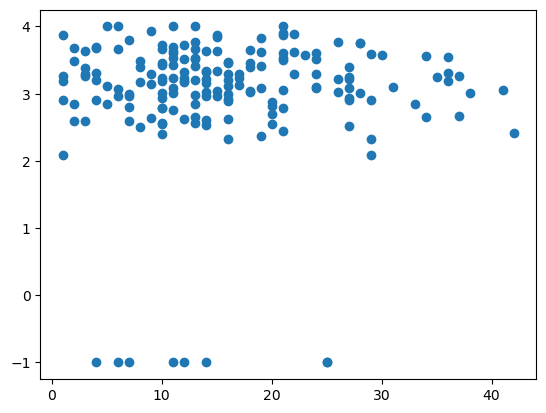

In [66]:
Activity_Hours = td.groupby("StudentID")["HoursPerWeek"].sum()
merged = pd.merge(df, Activity_Hours, on='StudentID', how='inner')
plt.scatter(merged["HoursPerWeek"], merged["GPA_Sem2"])

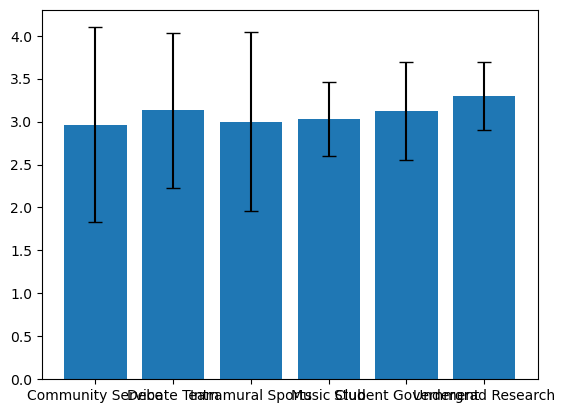

In [82]:
merged_df = pd.merge(df, td, on='StudentID', how='inner')
lead_yes = merged_df[merged_df["LeadershipRole"] == "Yes"]
meanG = lead_yes.groupby("Activity")["GPA_Sem2"].mean()
stdG = lead_yes.groupby("Activity")["GPA_Sem2"].std()
val_act = stdG.dropna().index
meanval = meanG.loc[val_act].tolist()
stdval = stdG.loc[val_act].tolist()
act = val_act.tolist()
plt.bar(act, meanval, yerr=stdval, capsize=5)
plt.show()

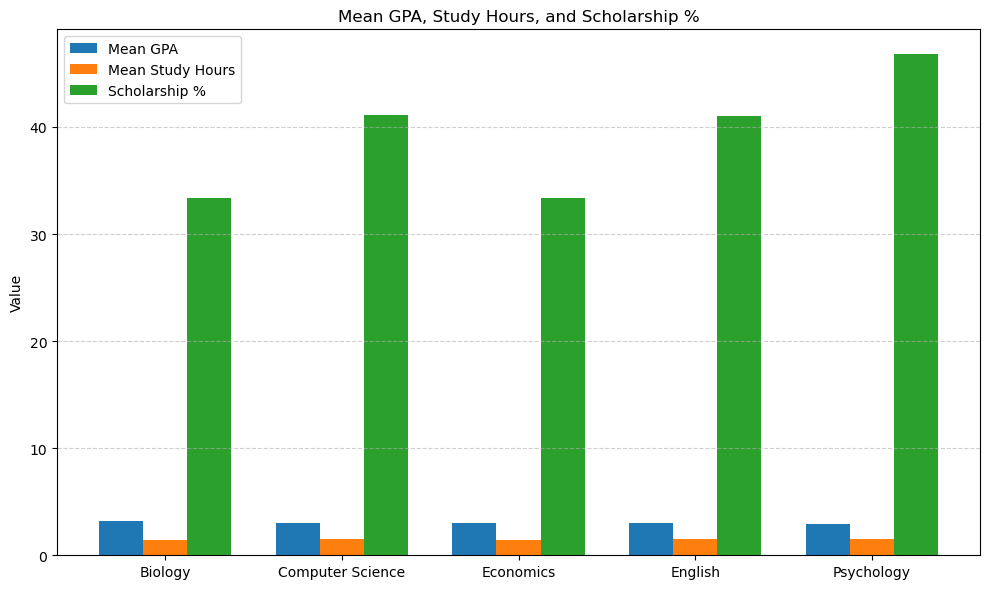

In [92]:
major_stats = df.groupby('Major').agg(
    MeanGPA=('GPA_Sem2','mean'),
    MeanStudyIntensity=('StudyIntensity','mean'),
    ScholarshipRate=('Scholarship', lambda x: (x=='Yes').mean()*100))

major_stats_plot = major_stats.reset_index()
x = major_stats_plot['Major']
width = 0.25
x_indexes = range(len(x))

plt.figure(figsize=(10, 6))
plt.bar([i - width for i in x_indexes], major_stats_plot['MeanGPA'], width=width, label='Mean GPA')
plt.bar(x_indexes, major_stats_plot['MeanStudyIntensity'], width=width, label='Mean Study Hours')
plt.bar([i + width for i in x_indexes], major_stats_plot['ScholarshipRate'], width=width, label='Scholarship %')

plt.xticks(ticks=x_indexes, labels=x)
plt.ylabel('Value')
plt.title('Mean GPA, Study Hours, and Scholarship %')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [110]:
gpa_mean = merged_df['GPA_Sem2'].to_numpy().mean()
gpa_std = merged_df['GPA_Sem2'].to_numpy().std()
gpa_rate=merged_df['GPA_Sem2'].to_numpy()
z_scores = (gpa_rate - gpa_mean) / gpa_std
merged_df["SuccessScore"] = z_scores

print(merged_df.sort_values(by = "SuccessScore", ascending = False).head(15))

     StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
64        1049           Biology  Sophomore      3.95      4.00   
63        1049           Biology  Sophomore      3.95      4.00   
250       1182         Economics  Sophomore      3.69      4.00   
249       1182         Economics  Sophomore      3.69      4.00   
62        1049           Biology  Sophomore      3.95      4.00   
11        1013           English   Freshman     -1.00      4.00   
7         1010           English  Sophomore      3.64      4.00   
148       1108        Psychology   Freshman      3.49      4.00   
352       1238        Psychology  Sophomore      3.22      3.94   
351       1238        Psychology  Sophomore      3.22      3.94   
38        1034  Computer Science     Senior      3.16      3.91   
36        1034  Computer Science     Senior      3.16      3.91   
37        1034  Computer Science     Senior      3.16      3.91   
287       1203  Computer Science     Junior      2.47      3.8

---
## Part C — Communication *(15 pts)*

* Explain two actionable insights from your data
* Point to the data that seems to be the most powerful.
* The discussion here should be at least 200 words.
* Your explanation should be in markdown.  Modify the markdown cell below.  
 

* Bullet points  **boldface**
* 1) People with scholarships have higher GPAs on average. There are a lot of factors that could make this ture, for one many scholarships have a minimum gpa that students need to meet in order to keep their scholarship, leading to a higher expectation and effort. Another reason could be that these students were more hardworking to begin with which is why they have scholarships. A third reason could be that the students with scholarships have given up more to go to college, therefore valuing thier acedemics more and working harder to maintain a high gpa. 
  2) People who attend more than 90% of class have higher GPAs on average than people who attend less than 90% of class. This makes a lot of sense because people who miss a lot of classes will miss course content and most likely perform worse on exams and homeworks. Also, usually high achieving people 
  3) People with a leadership role in Undergrad Research have the highest GPA compared to other leadership roles
* One of the most powerful points is that leadership roles in undergrad research tend to lead to higher gpas because this could help a student decide where to spend more of their efforts